In [1]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')

print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [3]:
#splitting data  into images and labels
X = data.drop('0', axis=1)
y= data['0']

In [4]:
#reshaping the data to it can be displayed as images
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2)

In [5]:
X_train= np.reshape(X_train.values, (X_train.shape[0], 28, 28))
X_test = np.reshape(X_test.values,(X_test.shape[0], 28, 28 ))

In [6]:
print(X_test.shape)

(74490, 28, 28)


In [7]:
X_test.shape

(74490, 28, 28)

In [8]:
word_dict ={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',
            9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',
            17:'R',18:'S',19:'T',
            20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

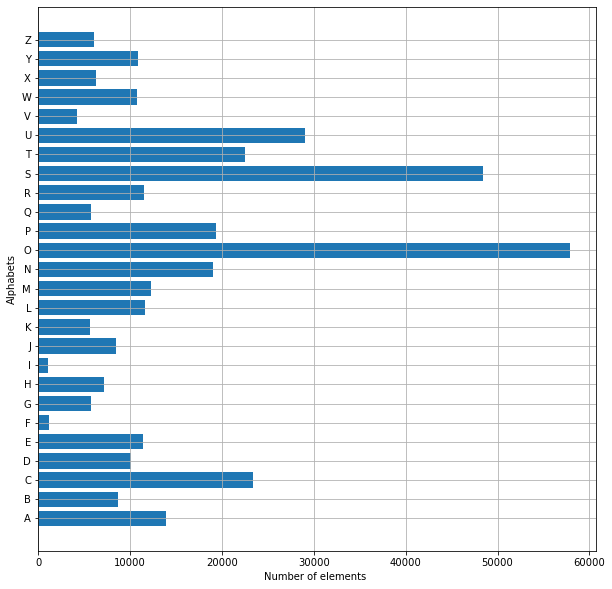

In [9]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()


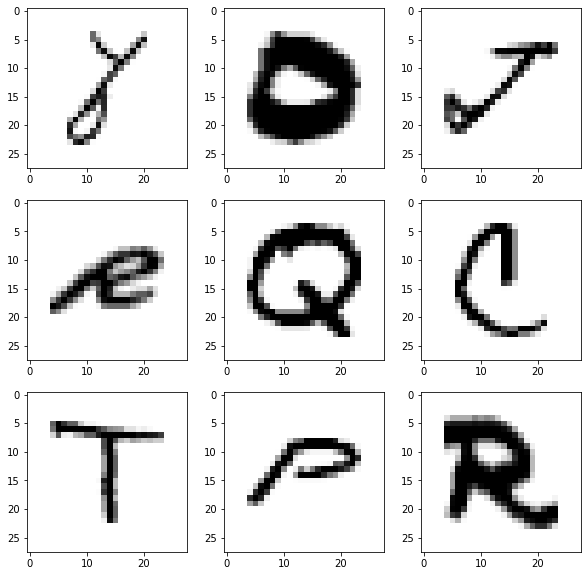

In [10]:
#shuffling the data
shuff= shuffle(X_train[:100])

fig,ax = plt.subplots(3,3,figsize= (10,10))
axes= ax.flatten()  # flattens data into 1d

for i in range(9):
    _,shu= cv2.threshold(shuff[i], 30 , 20, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i],(28,28)), cmap ='Greys')
plt.show()

In [11]:
#reshaping the data so it can be put into model
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)


In [12]:
X_train.shape

(297960, 28, 28, 1)

In [13]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [14]:
train_yOHE = to_categorical(y_train, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(y_test, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [15]:
# now creating a CNN model  it is used to extract features from images
model = Sequential()
model.add(Conv2D(filters= 32, kernel_size= (3,3), activation='relu',
                input_shape= (28,28,1)))
model.add(MaxPool2D(pool_size= (2,2), strides= 2))
model.add(Conv2D(filters= 64, kernel_size= (3,3), activation='relu',
                padding = 'same'))
model.add(MaxPool2D(pool_size= (2,2), strides= 2))
model.add(Conv2D(filters= 128, kernel_size= (3,3), activation='relu',
                padding= 'same'))
model.add(MaxPool2D(pool_size= (2,2), strides= 2))
model.add(Conv2D(filters= 256, kernel_size= (3,3), activation='relu',
                padding= 'same'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(26, activation='softmax'))

In [16]:
model.compile(optimizer= Adam(learning_rate = 0.001), loss='categorical_crossentropy',
             metrics= 'accuracy')
history= model.fit(X_train, train_yOHE, epochs= 1, validation_data=(X_test, test_yOHE))

9312/9312 [==============================] - 122s 12ms/step - loss: 0.1663 - accuracy: 0.9543 - val_loss: 0.0917 - val_accuracy: 0.9765


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)         2

In [18]:
#saving the parameters
model.save(r'model_hand.h5')

In [19]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9764934778213501]
The training accuracy is : [0.9543193578720093]
The validation loss is : [0.09174814075231552]
The training loss is : [0.16625037789344788]


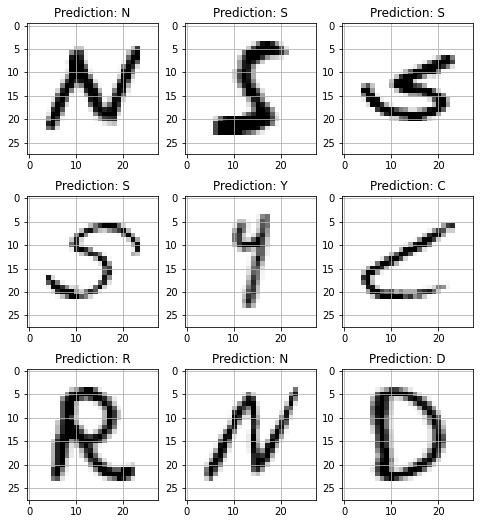

In [24]:
fig, axes= plt.subplots(3,3,figsize = (8,9))
axes= axes.flatten()


for i , ax in enumerate(axes):
    img = np .reshape(X_test[i], (28,28))
    ax.imshow(img, cmap = 'Greys')
    
    pred= word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()